# Classification model using KNNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_16_genes_6_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,BAP1,EPAS1,NF2,PTEN,TSC1,VHL,Y
0,0,33.677294,37.95811,33.96080,36.73944,32.93402,32.30615,1
1,1,32.643149,38.83281,33.69899,37.13114,33.16630,32.19988,1
2,2,32.368866,37.19345,34.07472,37.91878,33.63282,31.49147,1
3,3,31.895400,39.46713,33.14612,37.77827,32.88250,32.11538,0
4,4,33.968348,38.49884,32.58079,37.99008,33.44515,33.33646,1


In [3]:
X = data.iloc[:,1:7  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          BAP1     EPAS1       NF2      PTEN      TSC1       VHL
0    33.677294  37.95811  33.96080  36.73944  32.93402  32.30615
1    32.643149  38.83281  33.69899  37.13114  33.16630  32.19988
2    32.368866  37.19345  34.07472  37.91878  33.63282  31.49147
3    31.895400  39.46713  33.14612  37.77827  32.88250  32.11538
4    33.968348  38.49884  32.58079  37.99008  33.44515  33.33646
..         ...       ...       ...       ...       ...       ...
176  33.843872  39.13826  33.58214  37.99666  32.93248  31.79913
177  32.519967  35.86338  33.10420  34.65038  32.62658  31.66344
178  33.115209  37.91340  33.80118  36.77314  32.81059  32.39461
179  32.895151  37.96870  33.51366  36.08937  34.04810  32.34561
180  33.404526  38.75226  33.67890  36.87734  33.82576  30.34566

[181 rows x 6 columns]
Numero de pacientes:  181


### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.5405


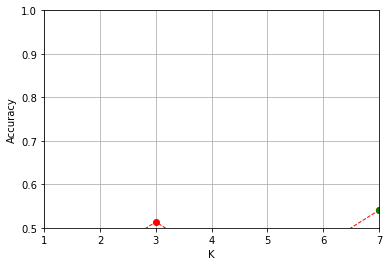

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x0000014C8902E3A0>,
                     n_neighbors=7)

### 6. Predictions

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,1
2,0,0,0
3,1,1,1
4,0,1,1


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.5482758620689655
Best result of the cross validation of the model (manhattan) with the best paramters:0.479064039408867


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.6388888888888888
Final accuracy on the testing dataset (manhattan): 0.5945945945945946


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[38 30]
 [22 54]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59        68
           1       0.64      0.71      0.67        76

    accuracy                           0.64       144
   macro avg       0.64      0.63      0.63       144
weighted avg       0.64      0.64      0.64       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[11  6]
 [ 9 11]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.55      0.65      0.59        17
           1       0.65      0.55      0.59        20

    accuracy                           0.59        37
   macro avg       0.60      0.60      0.59        37
weighted avg       0.60      0.59      0.59        37

